In [308]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [309]:
files = ["2015.csv", "2016.csv", "2017.csv", "2018.csv", "2019.csv"]
dataframe = {file: pd.read_csv(file) for file in files}

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [310]:
df_2015 = dataframe['2015.csv']
print(df_2015.head())


       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

In [311]:
df_2016 = dataframe['2016.csv']
print(df_2016.head())

       Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                

In [312]:
df_2017 = dataframe['2017.csv']
print(df_2017.head())

       Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0 

In [313]:
df_2018 = dataframe['2018.csv']
print(df_2018.head())

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  
0                      0.393  
1                      0.340  
2                

In [314]:
df_2019 = dataframe['2019.csv']
print(df_2019.head())

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [315]:
df_2015.info()
df_2016.info()
df_2017.info()
df_2018.info()
df_2019.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [316]:
df_2015.describe()


,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [317]:
df_2016.describe()


,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [318]:
df_2017.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [319]:
df_2018.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [320]:
df_2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [321]:
df_2015.shape


(158, 12)

In [322]:
df_2016.shape

(157, 13)

In [323]:
df_2017.shape

(155, 12)

In [324]:
df_2018.shape

(156, 9)

In [325]:
df_2019.shape

(156, 9)

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [326]:
# as mentioned in kaggle it is Sustainable Development Solutions Network and it is trustworthy 

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [327]:
# the data is between 2015-2019 and it was released at the end of each year so i think it's up-to-date

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [328]:
# the data is consistent because it has the same types,values
# تكون موجودة في اكثر من مكان وفي كل مكان بنفس النوع 

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [329]:
df_2015.head()
# All the data are relevance so no need to do anything
#السامبل اخذ العينة الصح للدراسة اللي ابغاها
#الفاريبلز نتخلص من الكولمن اللي مالها معنى ولا فائدة

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [330]:
df_2015.duplicated().sum()
# theres no duplicated records so i dont need to drop anything 

0

In [331]:
df_2016.duplicated().sum()

0

In [332]:
df_2017.duplicated().sum()

0

In [333]:
df_2017.duplicated().sum()

0

In [334]:
df_2018.duplicated().sum()

0

In [335]:
#df_2019.duplicated().sum()
df_2015['Country'].unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [336]:
#Display number missing values per column
df_2015.isnull().sum().sort_values(ascending = False)

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [337]:
df_2016.isnull().sum().sort_values(ascending = False)

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [338]:
df_2017.isnull().sum().sort_values(ascending = False)


Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [339]:
df_2018.isnull().sum().sort_values(ascending = False)


Perceptions of corruption       1
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
dtype: int64

In [340]:
df_2018.dropna(axis = 0, inplace = True)
# i dropped the null cuz its not important value 

In [341]:
df_2019.isnull().sum().sort_values(ascending = False)

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [342]:
#we fill the data using mean/median or backwarding etc...

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [343]:
# check columns types(number), value format(int,float...),  outliers
# i change country or region to only country so it will help me in extracting the data 
df_2015.dtypes
df_2015.drop(columns=["Region"], inplace=True)
df_2015.head()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [344]:
df_2016.dtypes
#df_2016.drop(columns=["Region"], inplace=True)
#df_2016.head()


Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [345]:
df_2017.dtypes

Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

In [346]:
df_2018.dtypes
df_2018.rename(columns={'Country or region': 'Country'}, inplace=True)
df_2018.head()

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [347]:
df_2019.dtypes
df_2019.rename(columns={'Country or region': 'Country'}, inplace=True)
df_2019.head()
# the same goes here as 2018

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [348]:
df_2015.rename(columns = {'Economy (GDP per Capita)': 'GDP per capita', 
                         'Health (Life Expectancy)': 'Healthy life expectancy',
                         'Trust (Government Corruption)': 'Perceptions of corruption',
                         'Family': 'Social support', 'Happiness Rank': 'Overall rank',
                         'Happiness Score': 'Score'
                        }, inplace = True)



df_2016.rename(columns = {'Economy (GDP per Capita)': 'GDP per capita',
                            'Health (Life Expectancy)': 'Healthy life expectancy',
                            'Trust (Government Corruption)': 'Perceptions of corruption',
                            'Family': 'Social support', 'Happiness Rank': 'Overall rank',
                            'Happiness Score': 'Score'
                            }, inplace = True)


df_2017.rename(columns = {'Happiness.Rank': 'Overall rank', 'Happiness.Score': 'Score',
                            'Economy..GDP.per.Capita.': 'GDP per capita',
                            'Health..Life.Expectancy.': 'Healthy life expectancy',
                            'Trust..Government.Corruption.': 'Perceptions of corruption',
                            'Family': 'Social support'
                            }, inplace = True)


df_2018.rename(columns = {'Freedom to make life choices': 'Freedom'} , inplace = True)


df_2019.rename(columns = {'Freedom to make life choices': 'Freedom'} , inplace = True)


<Axes: xlabel='Score', ylabel='Country'>

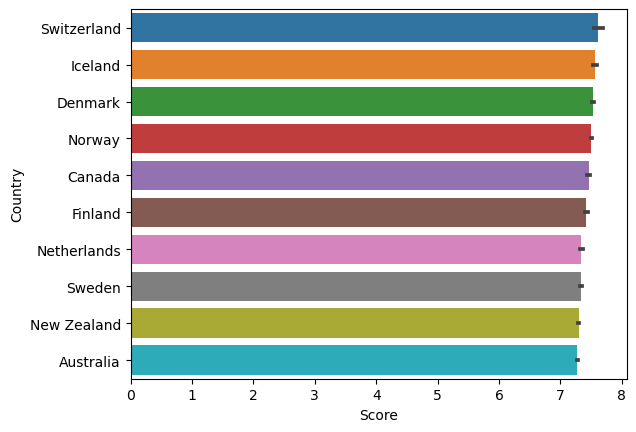

In [376]:
# to take an overall sight of the data 
df_2015['Year'] =2015
df_2016['Year'] =2016
df_2017['Year'] =2017
df_2018['Year'] =2018
df_2019['Year'] =2019
happiness_df = pd.concat([df_2015,df_2016,df_2017,df_2018,df_2019],axis=0)
sns.barplot(y=happiness_df['Country'][:10], x=happiness_df['Score']) 
# Q1: What countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness?
# here we can see the highest happiness rank (TOP 10)

In [350]:
#df1 = pd.concat([df_2015,df_2016,df_2017,df_2018,df_2019],axis=0)
#print(df1)
print(happiness_df)

                      Country  Overall rank  Score  Standard Error  \
0                 Switzerland             1  7.587         0.03411   
1                     Iceland             2  7.561         0.04884   
2                     Denmark             3  7.527         0.03328   
3                      Norway             4  7.522         0.03880   
4                      Canada             5  7.427         0.03553   
..                        ...           ...    ...             ...   
151                    Rwanda           152  3.334             NaN   
152                  Tanzania           153  3.231             NaN   
153               Afghanistan           154  3.203             NaN   
154  Central African Republic           155  3.083             NaN   
155               South Sudan           156  2.853             NaN   

     GDP per capita  Social support  Healthy life expectancy  Freedom  \
0           1.39651         1.34951                  0.94143  0.66557   
1           1

In [351]:
#no need because all of the types are compatible with the values themselves

In [377]:
column_names = df_2015.columns
for df in [df_2016, df_2017, df_2018, df_2019]:
    if df.columns.equals(column_names):
        print("Column names match.")
    else:
        print("Column names do not match.")
#thats why i can't add a "year" column smoothly


Column names do not match.
Column names do not match.
Column names do not match.
Column names do not match.


In [353]:
# check outliers by business, statistics, visualazation

In [378]:
results = {year: df[:1]['Country'][0] for year, df in dataframe.items()}
for year, country in results.items():
    year_without_csv = year.replace('.csv', '')
    print(f"In {year_without_csv}, the Happiest Country is {country}")

In 2015, the Happiest Country is Switzerland
In 2016, the Happiest Country is Denmark
In 2017, the Happiest Country is Norway
In 2018, the Happiest Country is Finland
In 2019, the Happiest Country is Finland


In [355]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [356]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [375]:
#happiness_df.drop_duplicates(subset=['Year'], inplace=True)

In [358]:
#Score_Q1 =happiness_df['Score'].quantile(0.25)
#Score_Q3 =happiness_df['Score'].quantile(0.75)

#Score_IQR = Score_Q3 - Score_Q1

#Score_lower_bound = Score_Q1 - 1.5 *Score_IQR
#Score_upper_bound = Score_Q3 + 1.5 * Score_IQR

#happiness_df[(happiness_df ['Score'] < Score_lower_bound) | (happiness_df['Score'] > Score_upper_bound)].shape

In [359]:
#score_5 = happiness_df ['Score'].quantile(0.05)
#score_95 = happiness_df ['Score'].quantile(0.95)

# Filter out outliers
#happiness_df[(happiness_df['Score'] < score_5) | (happiness_df ['Score'] > score_95)].shape

In [360]:
# go to delete ouliers
# Calculate the z-score for each data point in the 'data' column
#happiness_df['Score'] = zscore(happiness_df['Score'])

# Filter the DataFrame to remove outliers
#happiness_df[(happiness_df['Score'] > 3) | (happiness_df['Score'] < -3)].shape

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [361]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [362]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

In [379]:
#Q2: How did country ranks or scores change between the 2015 and 2016 as well as the 2016 and 2017 reports?
# here we can see that in 2015 the top 3 countries were Switzerland, Iceland, Denmark but in 2016 the top 3 were Denmark, Switzerland, Iceland and in 2017 they change to Norway,Denmark,Iceland 
# the top 3 was having the same countries but in 2017 Norway appears in the top 3 
happiness_2015_2017 = pd.concat([df_2015.head(3),df_2016.head(3),df_2017.head(3)],axis=0)

happiness_2015_2017.sort_values(by="Score",ascending=False).head(9)

,Country,Overall rank,Score,Standard Error,GDP per capita,Social support,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity,Dystopia Residual,Year,Region,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low,Dystopia.Residual
0,Switzerland,1,7.587,0.03411,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.51738,2015,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,2,7.561,0.04884,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.70201,2015,NaN,NaN,NaN,NaN,NaN,NaN
0,Norway,1,7.537,NaN,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,NaN,2017,NaN,NaN,NaN,7.594445,7.479556,2.277027
2,Denmark,3,7.527,0.03328,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.49204,2015,NaN,NaN,NaN,NaN,NaN,NaN
0,Denmark,1,7.526,NaN,1.441780,1.163740,0.795040,0.579410,0.444530,0.361710,2.73939,2016,Western Europe,7.460,7.592,NaN,NaN,NaN
1,Denmark,2,7.522,NaN,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,NaN,2017,NaN,NaN,NaN,7.581728,7.462272,2.313707
1,Switzerland,2,7.509,NaN,1.527330,1.145240,0.863030,0.585570,0.412030,0.280830,2.69463,2016,Western Europe,7.428,7.590,NaN,NaN,NaN
2,Iceland,3,7.504,NaN,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540,NaN,2017,NaN,NaN,NaN,7.622030,7.385970,2.322715
2,Iceland,3,7.501,NaN,1.426660,1.183260,0.867330,0.566240,0.149750,0.476780,2.83137,2016,Western Europe,7.333,7.669,NaN,NaN,NaN


#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

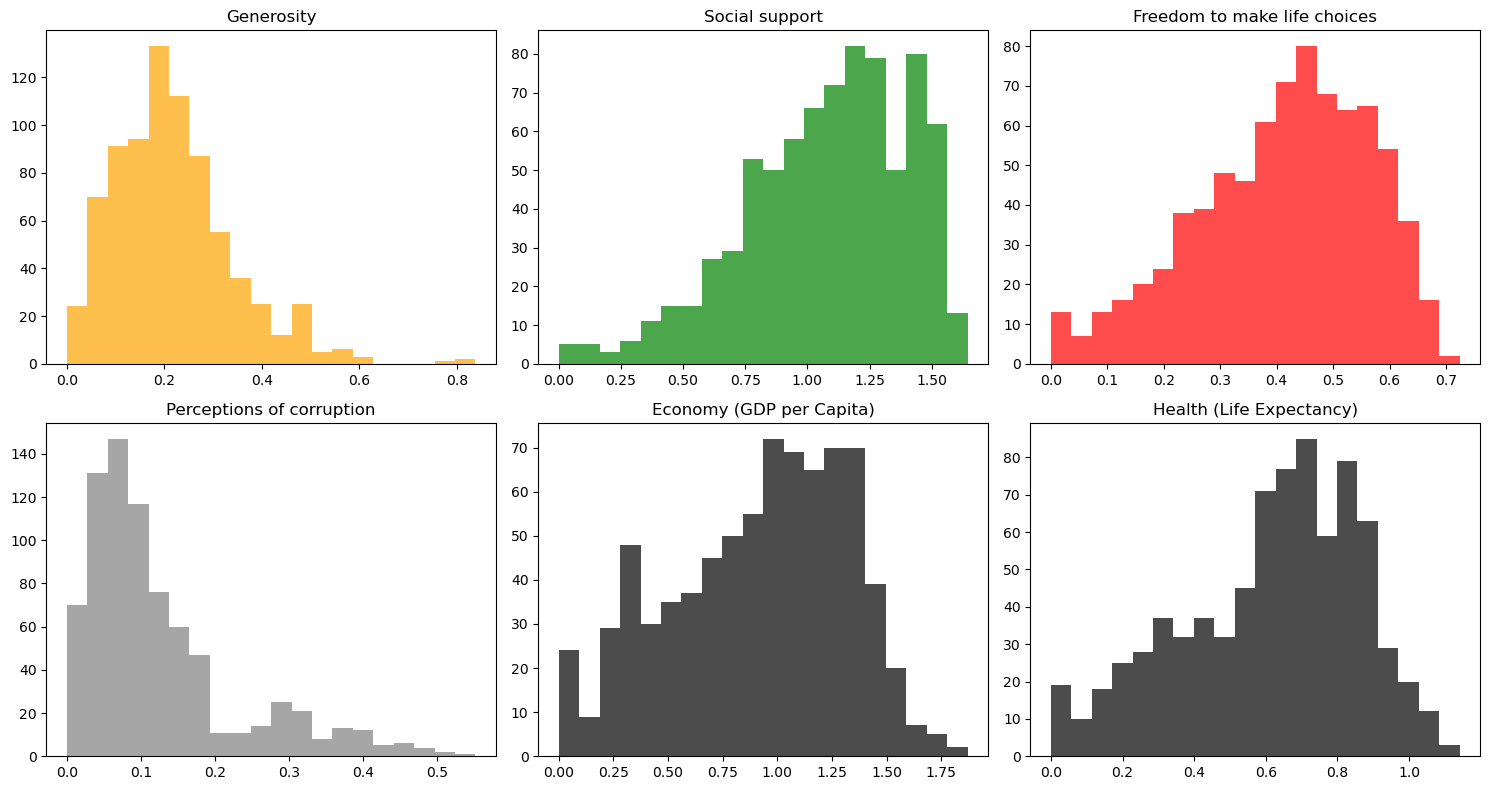

In [380]:
# Create a figure and an array of axes with a subplot for each histogram
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

axes[0][0].hist(happiness_df['Generosity'], bins=20, alpha=0.7, color='orange')
axes[0][0].set_title('Generosity')

axes[0][1].hist(happiness_df['Social support'], bins=20, alpha=0.7, color='green')
axes[0][1].set_title('Social support')

axes[0][2].hist(happiness_df['Freedom'], bins=20, alpha=0.7, color='red')
axes[0][2].set_title('Freedom to make life choices')


axes[1][0].hist(happiness_df['Perceptions of corruption'], bins=20, alpha=0.7, color='grey')
axes[1][0].set_title('Perceptions of corruption')

axes[1][1].hist(happiness_df['GDP per capita'], bins=20, alpha=0.7, color='black')
axes[1][1].set_title('Economy (GDP per Capita)')


axes[1][2].hist(happiness_df['Healthy life expectancy'], bins=20, alpha=0.7, color='black')
axes[1][2].set_title('Health (Life Expectancy)')


plt.tight_layout()
plt.show()

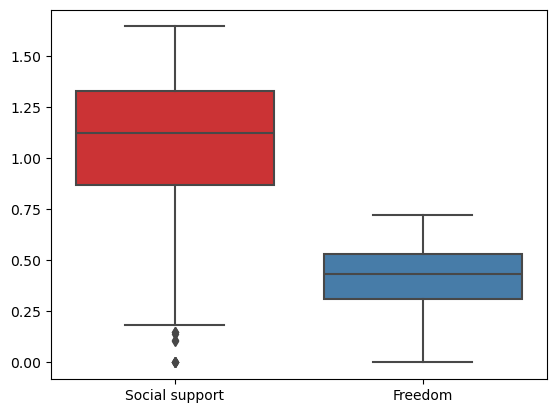

In [381]:
# lets start doing the boxplot
list_features = ["Social support", "Freedom"]
sns.boxplot(data = happiness_df.loc[:, list_features], orient = "v", palette = "Set1")
plt.show()

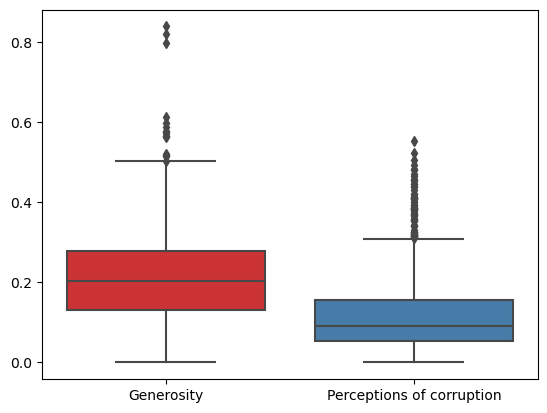

In [382]:
list_features = ["Generosity", "Perceptions of corruption"]
sns.boxplot(data = happiness_df.loc[:, list_features], orient = "v", palette = "Set1")
plt.show()

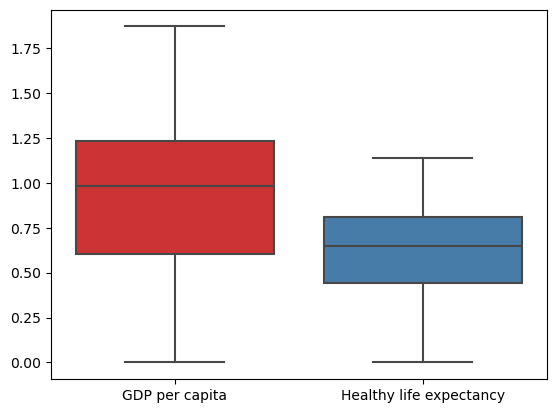

In [383]:
#Economy (GDP per Capita) , Family
list_features = ["GDP per capita", "Healthy life expectancy"]
sns.boxplot(data = happiness_df.loc[:, list_features], orient = "v", palette = "Set1")
plt.show()

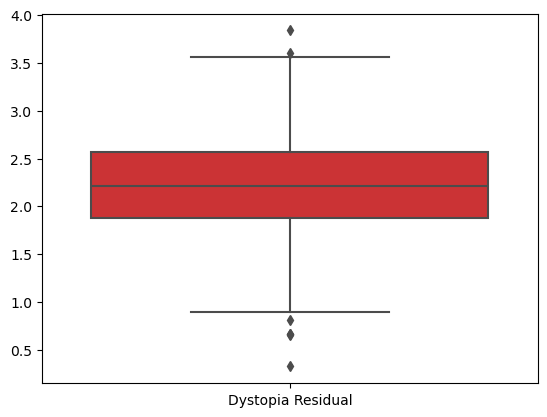

In [384]:
#Dystopia Residual
feature = ["Dystopia Residual"]
sns.boxplot(data = happiness_df.loc[:, feature], orient = "v", palette = "Set1")
plt.show()


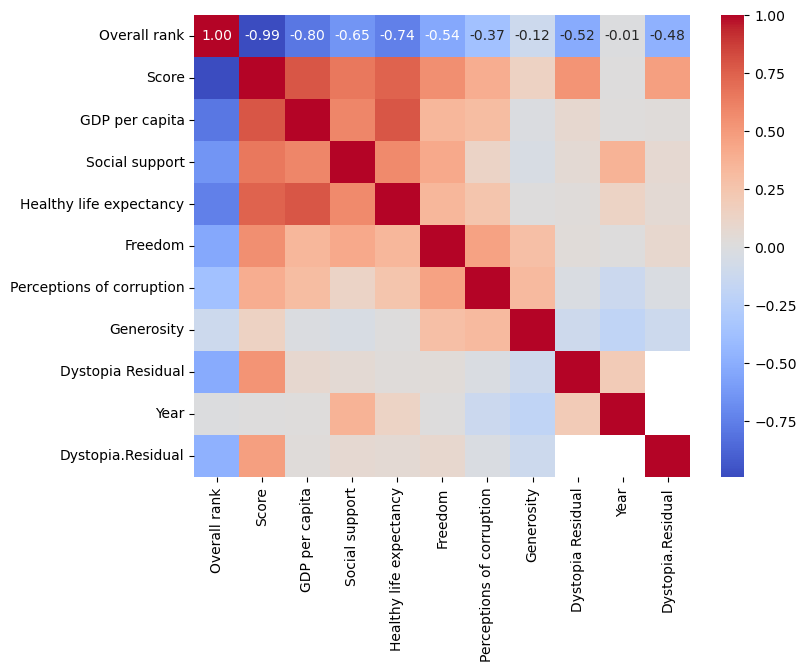

In [385]:
corr_matrix = happiness_df.select_dtypes(include=np.number).drop(columns=['Standard Error','Lower Confidence Interval','Upper Confidence Interval','Whisker.low','Whisker.high']).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

In [370]:
#happiness_df.drop_duplicates(subset=['Year'], inplace=True)
#happiness_df['Year'].duplicated().sum()


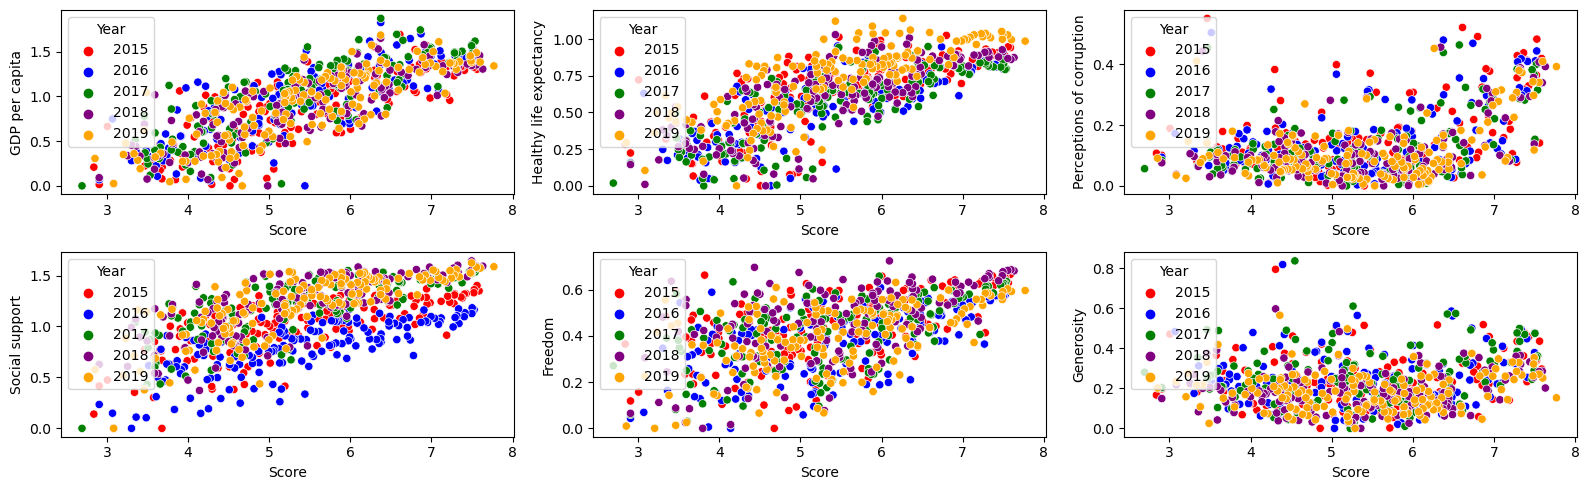

In [386]:


fig, axes = plt.subplots(2, 3, figsize=(16, 5))

custom_palette = ['red', 'blue', 'green', 'purple', 'orange']
sns.scatterplot(x='Score', y='GDP per capita', data=happiness_df, hue='Year', ax=axes[0, 0], palette=custom_palette)
sns.scatterplot(x='Score', y='Healthy life expectancy', data=happiness_df, hue='Year', ax=axes[0, 1], palette=custom_palette)
sns.scatterplot(x='Score', y='Perceptions of corruption', data=happiness_df, hue='Year', ax=axes[0, 2], palette=custom_palette)
sns.scatterplot(x='Score', y='Social support', data=happiness_df, hue='Year', ax=axes[1, 0], palette=custom_palette)
sns.scatterplot(x='Score', y='Freedom', data=happiness_df, hue='Year', ax=axes[1, 1], palette=custom_palette)
sns.scatterplot(x='Score', y='Generosity', data=happiness_df, hue='Year', ax=axes[1, 2], palette=custom_palette)

plt.tight_layout()
plt.show()

In [402]:
#Q3: Did any country experience a significant increase or decrease in happiness?
#Yes! as u can see in the graph below there was a different ex: Algaria -->2016 was more happy than 2019
diff = happiness_df.pivot(index='Country', columns='Year', values='Score').reset_index()
diff['2019'] = diff[2019] - diff[2018]
diff['2018'] = diff[2018] - diff[2017]
diff['2017'] = diff[2017] - diff[2016]
diff['2016'] = diff[2016] - diff[2015]

df_diff = diff[['Country', '2016', '2017', '2018', '2019']]
df_first_10=df_diff.head(10)
df_first_10.head()


Year,Country,2016,2017,2018,2019
0,Afghanistan,-0.215,0.434,-1.619999e-01,-0.429
1,Albania,-0.304,-0.011,-5.800005e-02,0.133
2,Algeria,0.750,-0.483,-5.770002e-01,-0.084
3,Angola,-0.167,-0.071,-7.629395e-08,NaN
4,Argentina,0.076,-0.051,-2.110000e-01,-0.302


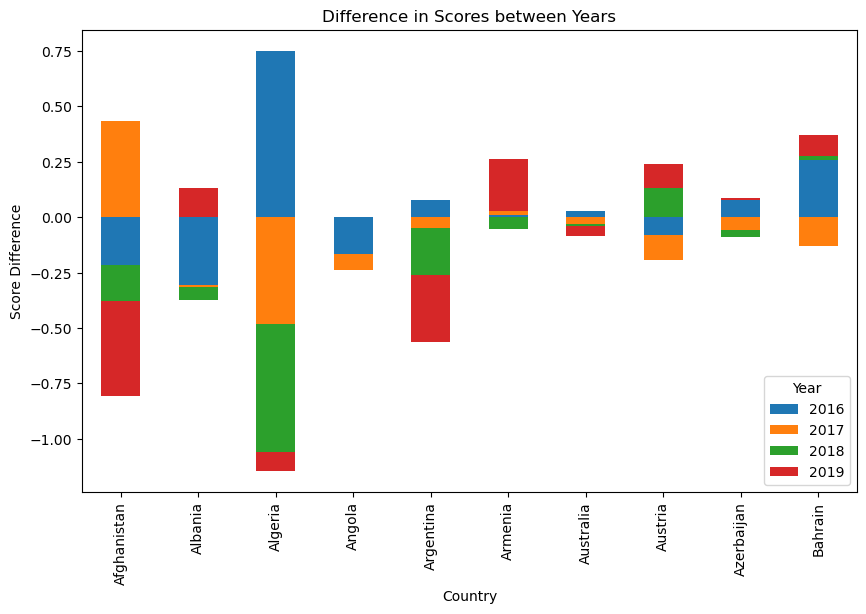

In [403]:
df_first_10.set_index('Country', inplace=True)

df_first_10.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Country')
plt.ylabel('Score Difference')
plt.title('Difference in Scores between Years')
plt.legend(title='Year')
plt.show()

In [373]:
# for the bonus questions: The top five Generous countries in 2019 ---> the most generous country is myanmar which one of the poorest country 
df_2019[['Country', 'Generosity']].sort_values(by = 'Generosity', ascending = False).head(5)

,Country,Generosity
130,Myanmar,0.566
91,Indonesia,0.498
146,Haiti,0.419
21,Malta,0.375
120,Kenya,0.372


In [374]:
# the top least generous countries in 2019 ----> heres we can see that the least generous country is greece which considered as "rich country"
df_2019[['Country', 'Generosity']].sort_values(by='Generosity', ascending=True).head(10)

,Country,Generosity
81,Greece,0.000
147,Botswana,0.025
89,Azerbaijan,0.035
88,Morocco,0.036
41,Lithuania,0.043
118,Georgia,0.043
103,Gabon,0.043
19,Czech Republic,0.046
65,Portugal,0.047
92,China,0.058


### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.